### The data set has information about features of silhouette extracted from the images of different cars

Four "Corgie" model vehicles were used for the experiment: a double decker bus, Cheverolet van, Saab 9000 and an Opel Manta 400 cars. This particular combination of vehicles was chosen with the expectation that the bus, van and either one of the cars would be readily distinguishable, but it would be more difficult to distinguish between the cars.



### 1. Read the dataset using function .dropna() - to avoid dealing with NAs as of now

In [1]:
# Declaration Page - Include all library declarations in this section
# For matrix computation
import numpy as np
# For data manipulation 
import pandas as pd
# For 2D plotting 
from matplotlib import pyplot as plt
# for chart
import seaborn as sns

In [2]:
vehicle_df = pd.read_csv('vehicle.csv').dropna()

In [3]:
# Replace all column names with "." to "_" for ease of column name references

In [4]:
vehicle_df.columns = vehicle_df.columns.str.replace('.','_')

In [5]:
vehicle_df.shape

(813, 19)

In [6]:
vehicle_df.dtypes

compactness                      int64
circularity                    float64
distance_circularity           float64
radius_ratio                   float64
pr_axis_aspect_ratio           float64
max_length_aspect_ratio          int64
scatter_ratio                  float64
elongatedness                  float64
pr_axis_rectangularity         float64
max_length_rectangularity        int64
scaled_variance                float64
scaled_variance_1              float64
scaled_radius_of_gyration      float64
scaled_radius_of_gyration_1    float64
skewness_about                 float64
skewness_about_1               float64
skewness_about_2               float64
hollows_ratio                    int64
class                           object
dtype: object

### 2. Print/ Plot the dependent (categorical variable) - Class column

Since the variable is categorical, you can use value_counts function

In [7]:
vehicle_df['class'].value_counts()

car    413
bus    205
van    195
Name: class, dtype: int64

In [8]:
plt_freq = pd.DataFrame(vehicle_df['class'].value_counts())

In [9]:
plt_freq.head()

,class
car,413
bus,205
van,195


Text(0.5,1,'Frequency Chart')

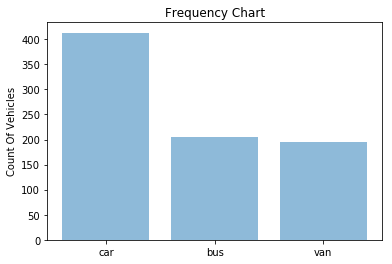

In [10]:
# y_pos = np.arange(len(plt_freq))
 
plt.bar(plt_freq.index, plt_freq['class'], align='center', alpha=0.5)
plt.ylabel('Count Of Vehicles')
plt.title('Frequency Chart')

### Check for any missing values in the data 

In [11]:
## Check if na values are left
vehicle_df.isna().sum()

compactness                    0
circularity                    0
distance_circularity           0
radius_ratio                   0
pr_axis_aspect_ratio           0
max_length_aspect_ratio        0
scatter_ratio                  0
elongatedness                  0
pr_axis_rectangularity         0
max_length_rectangularity      0
scaled_variance                0
scaled_variance_1              0
scaled_radius_of_gyration      0
scaled_radius_of_gyration_1    0
skewness_about                 0
skewness_about_1               0
skewness_about_2               0
hollows_ratio                  0
class                          0
dtype: int64

### 3. Standardize the data 

In [12]:
columns = vehicle_df.columns
X = vehicle_df[columns[:-1]]
y = vehicle_df[[columns[-1]]]

Since the dimensions of the data are not really known to us, it would be wise to standardize the data using z scores before we go for any clustering methods.
You can use zscore function to do this

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from scipy.stats import zscore

In [14]:
# We will create the PCA dimensions on this distribution. 
# sc = StandardScaler()
X_std =  X.apply(zscore)

In [15]:
X_std.head(2)

,compactness,circularity,distance_circularity,radius_ratio,pr_axis_aspect_ratio,max_length_aspect_ratio,scatter_ratio,elongatedness,pr_axis_rectangularity,max_length_rectangularity,scaled_variance,scaled_variance_1,scaled_radius_of_gyration,scaled_radius_of_gyration_1,skewness_about,skewness_about_1,skewness_about_2,hollows_ratio
0,0.163231,0.520408,0.060669,0.264970,1.283254,0.299721,-0.198517,0.129648,-0.217151,0.766312,-0.397397,-0.339014,0.301676,-0.321192,-0.071523,0.371287,-0.321809,0.171837
1,-0.322874,-0.619123,0.124067,-0.836393,-0.599253,0.085785,-0.591720,0.514333,-0.606014,-0.337462,-0.590034,-0.618754,-0.502972,-0.053505,0.538425,0.147109,0.003400,0.442318


### K - Means Clustering

### 4. Assign a dummy array called distortion

In [16]:
# Assigning a dummy array
distortions = []

You can later use this array to plot the elbow plot

### 5. Calculating distortion - C distance

In [17]:
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

Iterating values of k from 1 to 10 fit K means model
Using c distance - Get the measure for Sum of squares error.

In [18]:
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(X_std)
    distortions.append(
        sum(np.min(cdist(X_std, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X_std.shape[0])

### 6. Plotting Elbow/ Scree Plot

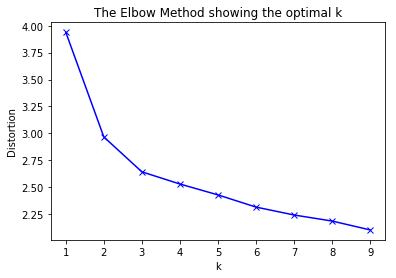

In [19]:
# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

Use Matplotlib to plot the scree plot - Note: Scree plot plots distortion vs the no of clusters

### Find out the optimal value of K

In [20]:
# in the above plot, the slope of the scree plot is straightening after 3

In [21]:
# Optimal K in this case will be 3

### Using optimal value of K - Cluster the data. 
Note: Since the data has more than 2 dimension we cannot visualize the data. As an alternative, we can observe the centroids and note how they are distributed across different dimensions

In [22]:
kmeans = KMeans(n_clusters=3)

You can use kmeans.cluster_centers_ function to pull the centroid information from the instance

In [23]:
kmeans.fit(X_std)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

### 7. Store the centroids in a dataframe with column names from the original dataset given 

In [24]:
# Extract cluster centers and use them for re-running the KMeans algorithm again
# cluster_center = kmeans.cluster_centers_
cluster_center = pd.DataFrame(kmeans.cluster_centers_, columns = columns[:-1])

Hint: Use pd.Dataframe function 

In [25]:
cluster_center

,compactness,circularity,distance_circularity,radius_ratio,pr_axis_aspect_ratio,max_length_aspect_ratio,scatter_ratio,elongatedness,pr_axis_rectangularity,max_length_rectangularity,scaled_variance,scaled_variance_1,scaled_radius_of_gyration,scaled_radius_of_gyration_1,skewness_about,skewness_about_1,skewness_about_2,hollows_ratio
0,-0.919871,-0.520093,-0.893208,-1.064356,-0.500422,-0.219074,-0.779121,0.865893,-0.745356,-0.484632,-0.782403,-0.783411,-0.384982,0.838787,-0.095243,-0.301716,-1.054206,-1.110695
1,1.130765,1.170942,1.195006,1.019095,0.215052,0.342508,1.271805,-1.190612,1.275484,1.092668,1.220381,1.281327,1.079542,-0.028795,0.162290,0.265665,-0.005356,0.183801
2,-0.233962,-0.573875,-0.307769,-0.030413,0.205073,-0.116532,-0.459042,0.325063,-0.487988,-0.536044,-0.413809,-0.463663,-0.601550,-0.619241,-0.061780,0.010668,0.812786,0.698973


### Use kmeans.labels_ function to print out the labels of the classes

In [26]:
clusters = kmeans.labels_
clusters

array([2, 2, 1, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 1, 0, 2, 1, 0, 0, 2, 2, 1,
       2, 0, 1, 1, 0, 2, 2, 2, 1, 2, 0, 1, 1, 0, 1, 0, 0, 2, 1, 0, 0, 0,
       0, 2, 0, 2, 1, 2, 1, 2, 2, 0, 1, 0, 1, 0, 0, 0, 2, 0, 1, 2, 1, 1,
       2, 0, 2, 1, 2, 0, 0, 1, 2, 0, 2, 1, 2, 0, 2, 0, 1, 2, 1, 2, 0, 1,
       0, 0, 1, 0, 0, 2, 2, 0, 1, 1, 0, 0, 1, 2, 2, 0, 0, 0, 2, 1, 1, 2,
       0, 0, 2, 0, 0, 0, 0, 0, 2, 1, 1, 2, 2, 0, 1, 1, 0, 2, 0, 2, 2, 1,
       0, 2, 1, 2, 2, 2, 2, 1, 2, 2, 1, 2, 1, 2, 0, 2, 0, 1, 2, 2, 1, 1,
       2, 1, 0, 0, 1, 1, 2, 1, 2, 2, 2, 2, 0, 1, 0, 2, 0, 1, 2, 2, 2, 1,
       2, 1, 2, 1, 2, 0, 1, 0, 0, 0, 2, 2, 1, 1, 2, 2, 2, 0, 1, 2, 2, 2,
       1, 0, 0, 1, 0, 2, 1, 0, 0, 0, 2, 1, 2, 1, 0, 0, 0, 0, 1, 2, 0, 2,
       1, 0, 2, 2, 0, 1, 0, 0, 2, 2, 1, 0, 1, 0, 2, 2, 1, 2, 2, 1, 1, 0,
       2, 2, 2, 1, 0, 2, 2, 0, 0, 2, 2, 1, 2, 0, 0, 1, 2, 2, 0, 0, 1, 0,
       2, 1, 0, 2, 1, 2, 2, 1, 2, 1, 0, 2, 2, 1, 2, 2, 2, 0, 2, 1, 1, 1,
       1, 0, 2, 1, 0, 0, 0, 2, 0, 1, 1, 0, 1, 2, 0,

## Hierarchical Clustering 

### 8. Variable creation

For Hierarchical clustering, we will create datasets using multivariate normal distribution to visually observe how the clusters are formed at the end

In [27]:
a = np.random.multivariate_normal([30, 0], [[3, 1], [1, 4]], size=[100,])
b = np.random.multivariate_normal([0, 10], [[3, 1], [1, 4]], size=[50,])
c = np.random.multivariate_normal([10, 20], [[3, 1], [1, 4]], size=[100,])

### 9. Combine all three arrays a,b,c into a dataframe

In [28]:
comb_data_arr = np.concatenate((a,b,c),axis = 0)

In [29]:
comb_df = pd.DataFrame(comb_data_arr, columns=(['Column_1','Column_2']))

In [30]:
comb_df.head(5)

,Column_1,Column_2
0,31.603239,2.136634
1,31.665376,0.282571
2,32.912811,2.091715
3,28.774000,0.493446
4,29.337796,1.116540


### 10. Use scatter matrix to print all the 3 distributions

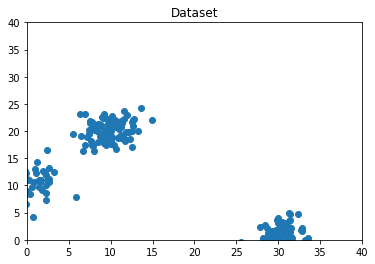

In [31]:
plt.plot()
plt.xlim([0, 40])
plt.ylim([0, 40])
plt.title('Dataset')
plt.scatter(comb_df.Column_1, comb_df.Column_2)
plt.show()

In [32]:
# As above, all three matrices are scattered around individual distributions

### 11. Find out the linkage matrix

In [33]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [34]:
# generate the linkage matrix
Z = linkage(comb_df, 'ward', metric='euclidean')

Use ward as linkage metric and distance as Eucledian

In [35]:
Z

array([[5.80000000e+01, 7.10000000e+01, 3.83689986e-02, 2.00000000e+00],
       [4.00000000e+00, 5.60000000e+01, 4.41459160e-02, 2.00000000e+00],
       [1.50000000e+02, 1.70000000e+02, 4.68212979e-02, 2.00000000e+00],
       [2.24000000e+02, 2.26000000e+02, 7.15934956e-02, 2.00000000e+00],
       [1.74000000e+02, 1.85000000e+02, 7.43196828e-02, 2.00000000e+00],
       [1.59000000e+02, 1.61000000e+02, 8.15933343e-02, 2.00000000e+00],
       [7.00000000e+00, 3.00000000e+01, 9.37511564e-02, 2.00000000e+00],
       [1.50000000e+01, 1.70000000e+01, 9.77379821e-02, 2.00000000e+00],
       [1.10000000e+01, 5.00000000e+01, 9.80458186e-02, 2.00000000e+00],
       [1.12000000e+02, 1.46000000e+02, 1.00927969e-01, 2.00000000e+00],
       [4.70000000e+01, 8.60000000e+01, 1.01061032e-01, 2.00000000e+00],
       [1.72000000e+02, 1.82000000e+02, 1.04370074e-01, 2.00000000e+00],
       [5.20000000e+01, 9.00000000e+01, 1.20184417e-01, 2.00000000e+00],
       [1.78000000e+02, 1.86000000e+02, 1.28410871e

### 12. Plot the dendrogram for the consolidated dataframe

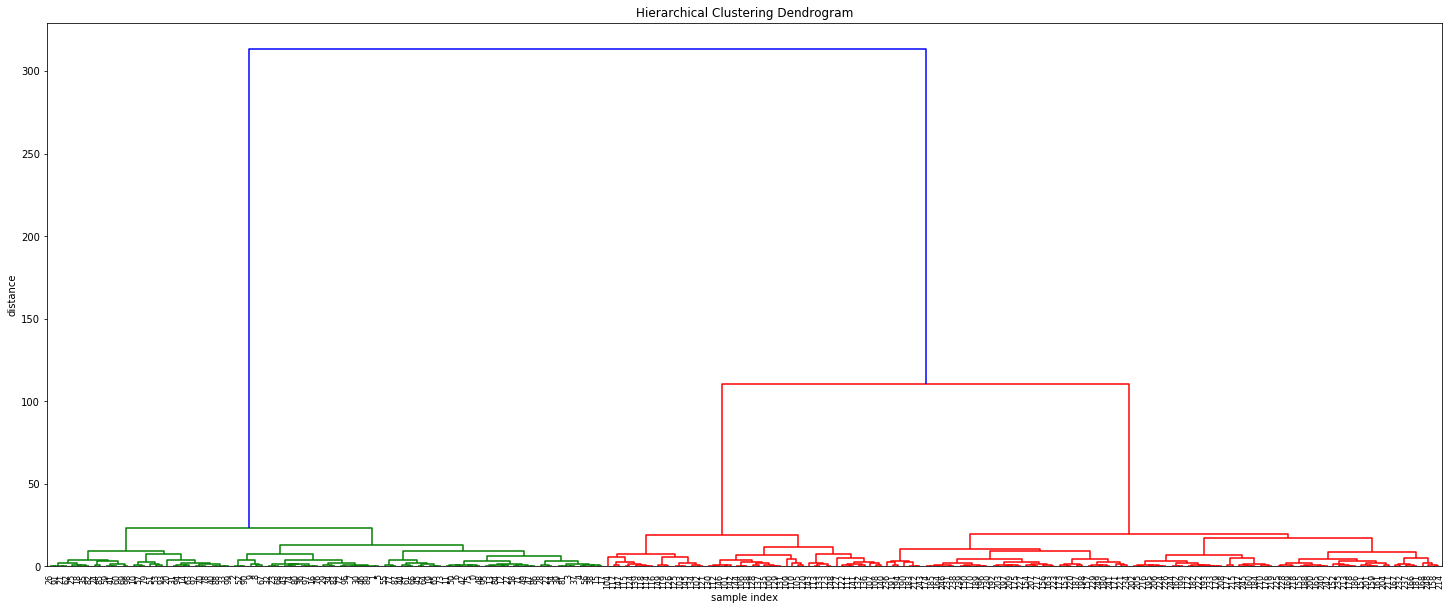

In [36]:
# calculate full dendrogram
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(
    Z,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
)
plt.show()

### 13. Recreate the dendrogram for last 12 merged clusters 

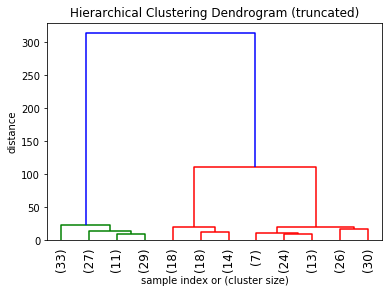

In [37]:
plt.title('Hierarchical Clustering Dendrogram (truncated)')
plt.xlabel('sample index or (cluster size)')
plt.ylabel('distance')
dendrogram(
    Z,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=12,  # show only the last p merged clusters
    leaf_rotation=90.,
    leaf_font_size=12.,
)
plt.show()

Hint: Use truncate_mode='lastp' attribute in dendrogram function to arrive at dendrogram 

### 14. From the truncated dendrogram, find out the optimal distance between clusters which u want to use an input for clustering data

In [38]:
# Optimal distance between clusters is 60 considering all clusters are within the distance

In [39]:
max_d = 50

### 15. Using this distance measure and fcluster function to cluster the data into 3 different groups

In [40]:
from scipy.cluster.hierarchy import fcluster
clusters = fcluster(Z, max_d, criterion='distance')
clusters

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3], dtype=int32)

### Use matplotlib to visually observe the clusters in 2D space 

In [41]:
clust_flag_df = pd.DataFrame(clusters, columns = (['Cluster_f']))

In [42]:
comb_cat_df = pd.concat([comb_df,clust_flag_df], axis=1)

In [43]:
comb_cat_df.head()

,Column_1,Column_2,Cluster_f
0,31.603239,2.136634,1
1,31.665376,0.282571,1
2,32.912811,2.091715,1
3,28.774000,0.493446,1
4,29.337796,1.116540,1


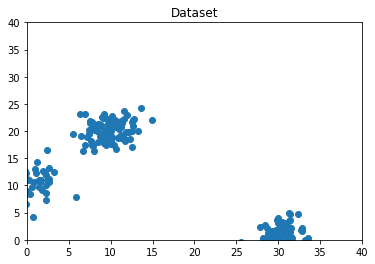

In [44]:
plt.plot()
plt.xlim([0, 40])
plt.ylim([0, 40])
plt.title('Dataset')
plt.scatter(comb_cat_df.Column_1, comb_cat_df.Column_2)
plt.show()

In [45]:
clust_freq = pd.DataFrame(comb_cat_df['Cluster_f'].value_counts())

Text(0.5,1,'Ind Count')

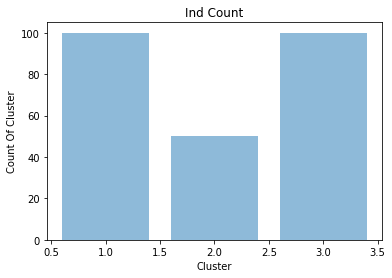

In [47]:
plt.bar(clust_freq.index, clust_freq['Cluster_f'], align='center', alpha=0.5)
plt.xlabel('Cluster')
plt.ylabel('Count Of Cluster')
plt.title('Ind Count')